In [58]:
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Bijectors

In [23]:
# Define base distribution

normal = tfd.Normal(loc=0, scale=1.)

In [32]:
# sample from the base distribution

n = 10000
z = normal.sample(n)

### Scale and shift bijector

In [33]:
# Define scale and shift

scale = 4.5 
shift = 7

In [34]:
# Define chain bijector

scale_and_shift = tfb.Chain([tfb.Shift(shift), tfb.Scale(scale)])

In [35]:
# We can also use call methods

scale_transf = tfb.Scale(scale)
shift_transf = tfb.Shift(shift)
scale_and_shift = shift_transf(scale_transf)

In [36]:
# Applied the forward tranformation

x = scale_and_shift.forward(z)

In [37]:
# Check the forward transformation

tf.norm(x - (scale*z + shift))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Plots

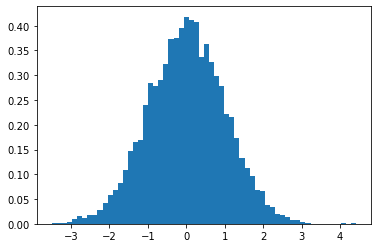

In [38]:
# Plot z density

plt.hist(z.numpy(), bins=60, density=True);

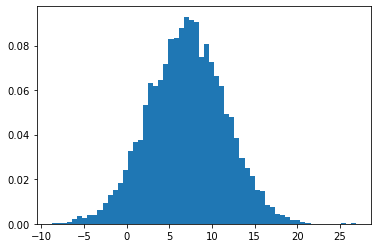

In [39]:
# Plot x density

plt.hist(x.numpy(), bins=60, density=True)
plt.show()

We can see that x is another normal distribution with mean equal to the shift constant, in this case, 7. The variance is equal to the scale squared, in our case, 20.25.

#### Inverse transformation

In [43]:
# Apply inverse transformation

inv_x = scale_and_shift.inverse(x)

If the transformation is bijective the inverse exists.

In [44]:
# Check inverse transformation

tf.norm(inv_x - z)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

We can see that the inverse of x is exactly equal to z as expected.

### Log probability

In [48]:
# Compute the log prob for x

log_prob_x = normal.log_prob(z) - scale_and_shift.forward_log_det_jacobian(z, event_ndims=0)
print(log_prob_x)

tf.Tensor([-3.1372404 -2.469462  -2.6065855 ... -2.633102  -2.428641  -2.4393382], shape=(10000,), dtype=float32)


In [50]:
# We can also use the inverse transformation

log_prob_x = (normal.log_prob(scale_and_shift.inverse(x)) + scale_and_shift.inverse_log_det_jacobian(x, event_ndims=0))
log_prob_x

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([-3.1372404, -2.469462 , -2.6065855, ..., -2.633102 , -2.428641 ,
       -2.4393382], dtype=float32)>

Both formulations are equivalent.

#### Broadcasting

In [51]:
x = tf.random.normal(shape=(100,1))

In [52]:
# Softfloor bijector

softfloor = tfb.Softfloor(temperature=0.01)
y = softfloor.forward(x)
print(y.shape)

(100, 1)


In [75]:
# Softfloor bijector using broadcasting

softfloor = tfb.Softfloor(temperature=[0.2, 1.])
y = softfloor.forward(x)
print(y.shape)

(2000, 2)


In [76]:
# Softfloor bijector using broadcasting

softfloor = tfb.Softfloor(temperature=[0.01, 0.1, 1.])

In [77]:
# Plot routine

def _plot(nparams, bijector, params, x):
    bijector_params = tuple(getattr(bijector, name) for name in params)
    upper_params = [name[0].upper() + name[1:] for name in params]
    fig = plt.figure(figsize=(14, 5))
    lines = plt.plot(np.tile(x, nparams), bijector.forward(x))
    for l in zip(lines, *bijector_params):
        labels = ": {:.2f}, ".join(upper_params) + ': {:.2f}'
        l[0].set_label(labels.format(*l[1:]))
    plt.legend()
    plt.show()

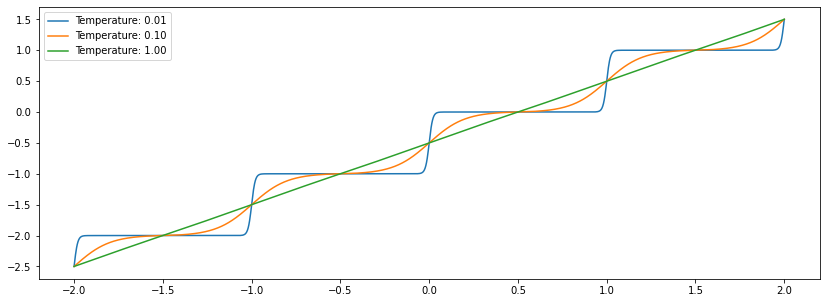

In [84]:
# Plot 

x = np.linspace(-2, 2, 2000)[..., np.newaxis]
_plot(3, softfloor, ['temperature'], x)

In [88]:
# Gumbel bijector using broadcasting

exps = tfb.GumbelCDF(loc=[0.5, 1, 1.5, 2, 3], scale=[1,2, 2, 3, 4])

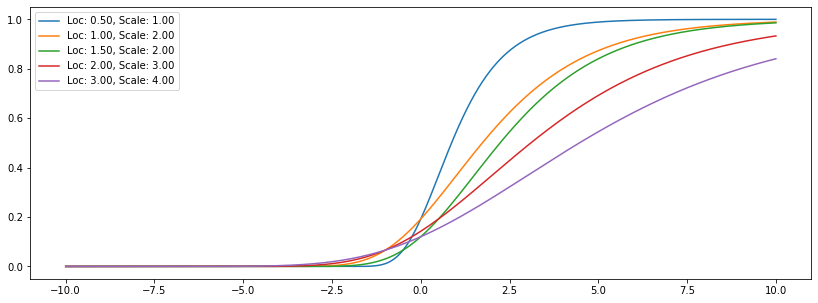

In [89]:
# Plot

x = np.linspace(-10, 10, 2000, dtype=np.float32)[..., np.newaxis]
_plot(5, exps, ['loc', 'scale'], x)